In [1]:
from scipy import stats

In [2]:
help(stats.linregress)

Help on function linregress in module scipy.stats._stats_mstats_common:

linregress(x, y=None)
    Calculate a linear least-squares regression for two sets of measurements.
    
    Parameters
    ----------
    x, y : array_like
        Two sets of measurements.  Both arrays should have the same length.
        If only x is given (and y=None), then it must be a two-dimensional
        array where one dimension has length 2.  The two sets of measurements
        are then found by splitting the array along the length-2 dimension.
    
    Returns
    -------
    slope : float
        slope of the regression line
    intercept : float
        intercept of the regression line
    rvalue : float
        correlation coefficient
    pvalue : float
        two-sided p-value for a hypothesis test whose null hypothesis is
        that the slope is zero.
    stderr : float
        Standard error of the estimated gradient.
    
    See also
    --------
    :func:`scipy.optimize.curve_fit` : Use 

In [3]:
import pandas as pd

In [5]:
import quandl
# set api key
quandl.ApiConfig.api_key = "sY8rR9LTz4kT5z2cs94v"

In [11]:
index = quandl.get('BSE/SENSEX',start_date = '2010-04-01')

In [12]:
index.head()

,Open,High,Low,Close
Date,,,,
2010-04-01,17555.04,17706.56,17555.04,17692.62
2010-04-05,17693.66,17948.54,17693.66,17935.68
2010-04-06,17940.32,17991.41,17898.00,17941.37
2010-04-07,17915.60,18047.86,17878.31,17970.02
2010-04-08,17950.56,17960.91,17679.34,17714.40


In [14]:
tcs = quandl.get('NSE/TCS',start_date='2010-04-01')

In [15]:
tcs.head()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,
2010-04-01,786.35,809.8,782.10,808.0,807.80,2890716.0,23087.28
2010-04-05,817.00,817.0,799.25,803.0,803.35,1500918.0,12069.64
2010-04-06,808.90,808.9,792.15,796.0,796.05,1851183.0,14776.78
2010-04-07,790.00,809.0,781.15,798.2,798.05,1512279.0,11983.17
2010-04-08,796.00,807.5,790.00,795.1,799.45,2247219.0,18033.53


In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

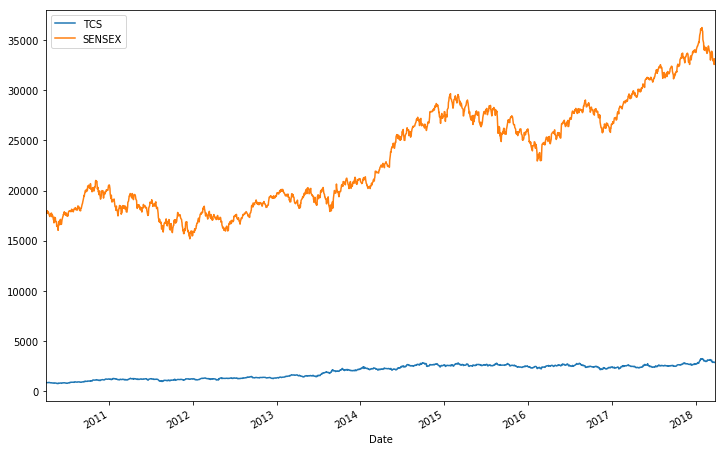

In [17]:
tcs['Close'].plot(label='TCS',figsize=(12,8))
index['Close'].plot(label='SENSEX')
plt.legend()

In [18]:
tcs['Cumulative'] = tcs['Close']/tcs['Close'].iloc[0]
index['Cumulative'] = index['Close']/index['Close'].iloc[0]

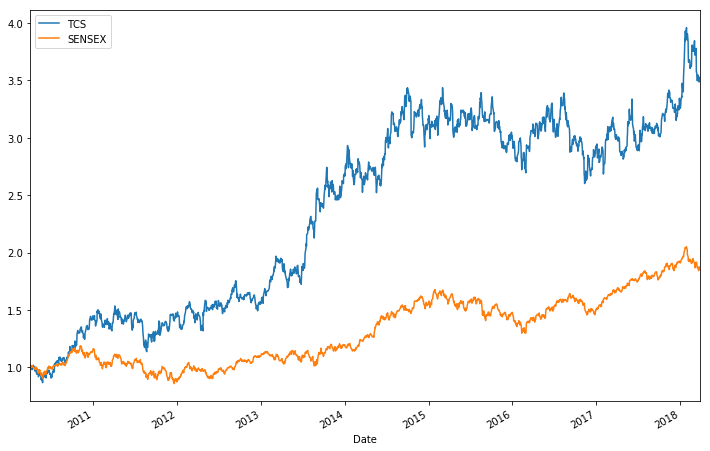

In [20]:
tcs['Cumulative'].plot(label='TCS',figsize=(12,8))
index['Cumulative'].plot(label='SENSEX')
plt.legend()

In [21]:
tcs['DAily return'] = tcs['Close'].pct_change(1)
index['Daily return'] = index['Close'].pct_change(1)

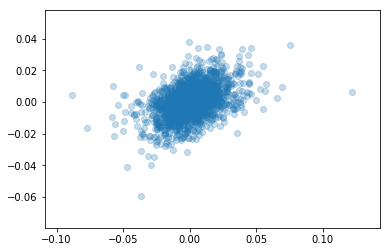

In [22]:
plt.scatter(tcs['DAily return'],index['Daily return'],alpha=0.25)

In [23]:
beta,alpha,r_value,p_value,std_err = stats.linregress(tcs['DAily return'].iloc[1:],index['Daily return'].iloc[1:])

In [24]:
beta

0.26712727996549479

In [25]:
alpha

0.00015823395513528033

In [26]:
r_value

0.43236166355206429